## Analysis

In [9]:
# Importing neccesary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mysql.connector
from sqlalchemy import create_engine
from scipy import stats
from scipy.stats import sem
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from io import StringIO
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from sklearn import datasets
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas
from sklearn import linear_model

## Datasets Explaination
1. The Classification dataset is the list of films from Leonard Maltin's Guide. This dataset has 100 entries in total and 9 distinguished columns : Title, Year, Time, Cast, Rating, Description, Origin, Time_code and Good.

2. The Regression and Hypothesis testing dataset is GPA of college students. This dataset has 219 entries in total and 10 distinguished columns: GPA, HSGPA, SATV, SATM, Male, HU, SS, FirstGen, White and CollegeBound.

In [336]:
# Importing the classification dataset
from rdatasets import data
df_Film = data("Stat2Data", "Film")
display(df_Film)

,Title,Year,Time,Cast,Rating,Description,Origin,Time_code,Good
0,A_Ticklish_Affair,1963,89,5,2.0,7,0,short,0
1,Action_in_the_North_Atlantic,1943,127,7,3.0,9,0,long,1
2,And_the_Ship_Sails_On,1984,138,7,3.0,15,3,long,1
3,Autumn_Sonata,1978,97,5,3.0,11,5,long,1
4,Bachelor_Apartment,1931,77,6,2.5,7,0,short,0
...,...,...,...,...,...,...,...,...,...
95,Warning_Shot,1967,100,13,3.5,12,0,long,1
96,Whispering_Smith_vs._Scot._Yard,1951,77,5,2.0,9,1,short,0
97,Windows,1980,96,4,1.0,9,0,long,0
98,Windwalker,1980,108,5,2.5,11,0,long,0


In [176]:
# Data preprocessing 
print(df_Film.isnull().sum()) 
print(df_Film.info())

Title          0
Year           0
Time           0
Cast           0
Rating         0
Description    0
Origin         0
Time_code      0
Good           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        100 non-null    object 
 1   Year         100 non-null    int64  
 2   Time         100 non-null    int64  
 3   Cast         100 non-null    int64  
 4   Rating       100 non-null    float64
 5   Description  100 non-null    int64  
 6   Origin       100 non-null    int64  
 7   Time_code    100 non-null    object 
 8   Good         100 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 7.2+ KB
None


## Classification (Logistic Regression)

In [337]:
 
feature_cols = ['Time', 'Rating','Cast','Description'] ## Selecting which feautres we want to use for our modeling
X = df_Film[feature_cols] # X will be an independent values
y = df_Film['Good'] # y is the dependent value

Explaination: 
The purpose of logistic regression is to model the relationship between the independent variables (features) and the probability of a particular outcome occurring. I want to use the logistic regression to identify factors that makes an film rank " Good" based on its time, rating, cast crews and movie's description

In [338]:
#Split the dataset (X and y)into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Train size=', X_train.shape[0], 'Test size=', X_test.shape[0]) 

Train size= 75 Test size= 25


In [339]:
# Running the Logistic Regression 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Calculate and display the Confusion Matrix

In [340]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cnf_matrix)

Confusion matrix:
 [[16  1]
 [ 1  7]]


Text(0.5, 257.44, 'Predicted label')

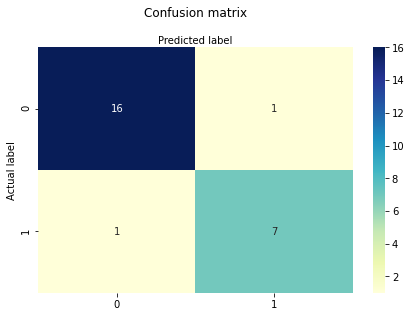

In [341]:
#Visualizing Confusion Matrix using Heatmap
%matplotlib inline
class_names=[1,0] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap using sns package 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Figure 1 : Confusion Matrix of the Logistic Regression

## Evaluate the model performance

In [320]:
##Print out the evaluation/performance metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.3f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.3f}")
print(f"F1: {metrics.f1_score(y_test, y_pred):.3f}")

Accuracy: 0.920
Precision: 0.875
Recall: 0.875
F1: 0.875


## Classification (Decision Tree)

Explaination : 
Decision trees are machine learning models that serve various purposes in both classification and regression tasks.I want to use the decision tree to identify factors that makes an film rank " Good" based on its time, rating, cast crews and movie's description then compare the result to the logistic regression method.

In [342]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a decision tree classifier with Gini as the criterion
clf= DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [343]:
# Making prediction with the model
y_pred = clf.predict(X_test)

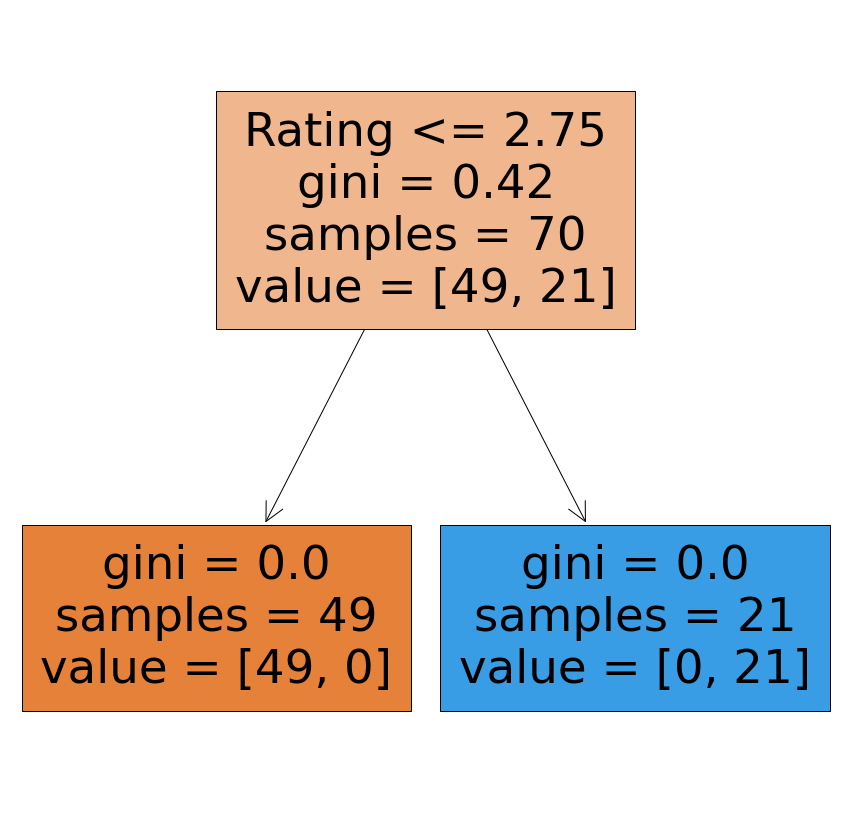

In [344]:
# Visualize the tree structure
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, feature_names=feature_cols, filled=True)

Figure 2: Gini Criterion Tree Structure 

## Calculate and display the Confusion Matrix

In [347]:
#Generate the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cnf_matrix)

Confusion matrix:
 [[20  0]
 [ 0 10]]


Text(0.5, 257.44, 'Predicted label')

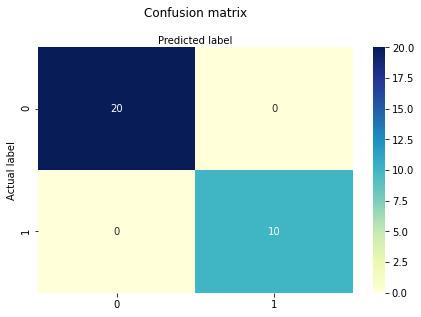

In [345]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Figure 3: Confusion matrix of Decision Tree

## Evaluate the model performance

In [306]:
##Print out the evaluation/performance metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
print("Precision:", metrics.precision_score(y_test, y_pred))   
print("Recall:", metrics.recall_score(y_test, y_pred))  

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Comparision between Logistic Regression and Decision Tree

In the Logistic Regression, our model provides the accuracy of 0.920 which is about 92%; this value is lower than the accuracy of Decision Tree's accuracy which is 1.0 or 100%. Furthermore, when we look at the precision,the term refers to a measure of the accuracy of the positive predictions made by the model.In our model, Decision Tree's value is also 1.0 or 100% which is higher than 0.875 or about 87.5% of the Logistic Regression method.

## Linear Regressions

In [4]:
# Importing the regression dataset
from rdatasets import data
df_GPA = data("Stat2Data", "FirstYearGPA")
display(df_GPA)

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1


In [322]:
# Data preprocessing 
print(df_GPA.isnull().sum()) 
print(df_GPA.info())

GPA             0
HSGPA           0
SATV            0
SATM            0
Male            0
HU              0
SS              0
FirstGen        0
White           0
CollegeBound    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           219 non-null    float64
 1   HSGPA         219 non-null    float64
 2   SATV          219 non-null    int64  
 3   SATM          219 non-null    int64  
 4   Male          219 non-null    int64  
 5   HU            219 non-null    float64
 6   SS            219 non-null    float64
 7   FirstGen      219 non-null    int64  
 8   White         219 non-null    int64  
 9   CollegeBound  219 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 17.2 KB
None


 Explaination : I want to use Linear Regression to predict the GPA of an college student base on their total SAT score (SATV + SATM) on the scale of 1600 . Since three is no total SAT score column, I will need to add that in the dataset.

In [7]:
# Creating an new column called total_SAT that add the score of the SATV and SATM together
df_GPA['total_SAT'] = df_GPA['SATV'] + df_GPA['SATM'] # Saturn Cloud Blog(2023)
# Display the dataframe with added column
display(df_GPA)

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound,total_SAT
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1,1450
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1,1460
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1,1210
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1,1440
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1,1220
...,...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1,1390
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1,1420
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1,1340
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1,1300


Model summary                             OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     19.70
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.44e-05
Time:                        20:19:42   Log-Likelihood:                -133.26
No. Observations:                 219   AIC:                             270.5
Df Residuals:                     217   BIC:                             277.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8960      0.272      

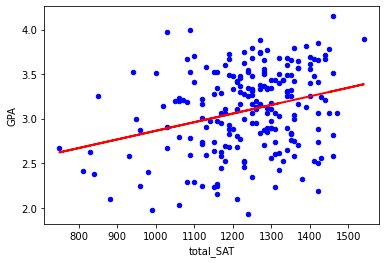

Predicted college GPA value for the 1400 SAT score is: 3.2517199496961013


In [328]:

# Fit linear regression
model = smf.ols('GPA ~ total_SAT',data = df_GPA).fit()

# Inspect the results
print("Model summary", model.summary())
# Plot the results of the linear regression model
df_GPA.plot.scatter(x='total_SAT', y='GPA', c='blue')
plt.plot(df_GPA['total_SAT'], model.predict(df_GPA), color='red', linewidth=2)
plt.xlabel('total_SAT')
plt.ylabel('GPA')
plt.show()

# Making prediction based on the model's trend
print("Predicted college GPA value for the 1400 SAT score is:", model.predict({"total_SAT": 1400})[0])

 Explaination : I want to use linear regression to predict the GPA of an college student base on their high school GPA on the scale of 4.

Model summary                             OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.78e-12
Time:                        20:19:01   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1799      0.262      

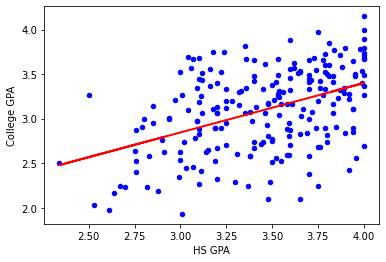

Predicted college GPA value for an 3.2 high school GPA is: 2.9558906770575497


In [327]:

# Fit linear regression
model_2 = smf.ols('GPA ~ HSGPA',data = df_GPA).fit()
# Inspect the results
print("Model summary", model_2.summary())
# Plot the results of the linear regression model
df_GPA.plot.scatter(x='HSGPA', y='GPA', c='blue')
plt.plot(df_GPA['HSGPA'], model_2.predict(df_GPA), color='red', linewidth=2)
plt.xlabel('HS GPA')
plt.ylabel('College GPA')
plt.show()
print("Predicted college GPA value for an 3.2 high school GPA is:", model_2.predict({"HSGPA": 3.2})[0])

## Multiple Linear Regression

Explaination : I want to use multiple linear regression to predict the GPA of an college student base on their high school GPA and total SAT score on the scale of 4.

In [16]:
X = df_GPA[['total_SAT','HSGPA']]
y = df_GPA['GPA']
regr = linear_model.LinearRegression()
regr.fit(X, y) # fit multiple linear regression model
# Making prediction with student having an total SAT of 1200 and 3.9 HS GPA 
predictedGPA = regr.predict([[1200, 3.9]])   
print(f"Predicted college GPA value for an 3.9 high school GPA and total SAT score of 1200 is: {predictedGPA[0]}")

Predicted college GPA value for an 3.9 high school GPA and total SAT score of 1200 is: 3.2937594354170447


# Hypothesis testing 

Explaination: In the "FirstGen" column, there is yes/no values,  which indicate is this student first gen college student or not, I want to identify are there any differences in the means of college GPA between first gen and non first gen students.

In [329]:
# Encoding the original data from the dataset :From 0 and 1 to yes and no for the "FirstGen" column
df_GPA['FirstGen'] = df_GPA['FirstGen'].replace(to_replace=[0, 1], value=['no', 'yes']) #Stack Overflow

In [330]:
# Display the dataset with FirstGen column changes
display(df_GPA)

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound,total_SAT
0,3.06,3.83,680,770,1,3.0,9.0,yes,1,1,1450
1,4.15,4.00,740,720,0,9.0,3.0,no,1,1,1460
2,3.41,3.70,640,570,0,16.0,13.0,no,0,1,1210
3,3.21,3.51,740,700,0,22.0,0.0,no,1,1,1440
4,3.48,3.83,610,610,0,30.5,1.5,no,1,1,1220
...,...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,no,1,1,1390
215,2.88,3.58,680,740,0,20.0,3.0,no,0,1,1420
216,2.65,3.15,590,750,1,8.5,8.5,no,1,1,1340
217,2.97,3.09,670,630,0,12.0,4.0,no,1,1,1300


## Conduct a two-sample t-test (the independent samples t-test) for variables

In [353]:

# Step 1 : Stating the Null, Alternative hypothesis and alpha value 
Null_Hypothesis = 'There is no difference between the means of GPA in an first-gen and non first-gen student'
Alternative_hypothesis = 'There is a statistical difference between the means of GPA in an first-gen and non first-gen student' 
alpha = 0.05

# Step 2 : Create 2 samples to gathering the data
sampA = df_GPA.loc[df_GPA['FirstGen'] == 'yes']['GPA']
sampB = df_GPA.loc[df_GPA['FirstGen'] == 'no']['GPA']

# Step 3 : Perform the t-stat and p-value calculation
t_statistic, p_value = ttest_ind(sampA, sampB)
print('t-stat',t_statistic)
print('p-value:', p_value)

# Step 4: Decide whether to reject or fail to reject your null hypothesis.
if p_value < alpha :
    print(f"The p-value is {p_value:.2f} < {alpha}. Therefore, we reject the Null Hypothesis")
# Step 5 : State a real-world conclusion
    print("There is a statistical difference between the means of GPA in an first-gen and non first-gen student.")
else :
    print(f"The p-value is {p_value:.2f} > {alpha}. Therefore, we fail to reject the Null Hypothesis")
    print("There is no difference between the means of GPA in an first-gen and non first-gen student.")

t-stat -2.335332665958965
p-value: 0.02043904426086219
The p-value is 0.02 < 0.05. Therefore, we reject the Null Hypothesis
There is a statistical difference between the means of GPA in an first-gen and non first-gen student.


# Relevant Graphs

Text(0.5, 1.0, 'GPA Distribution')

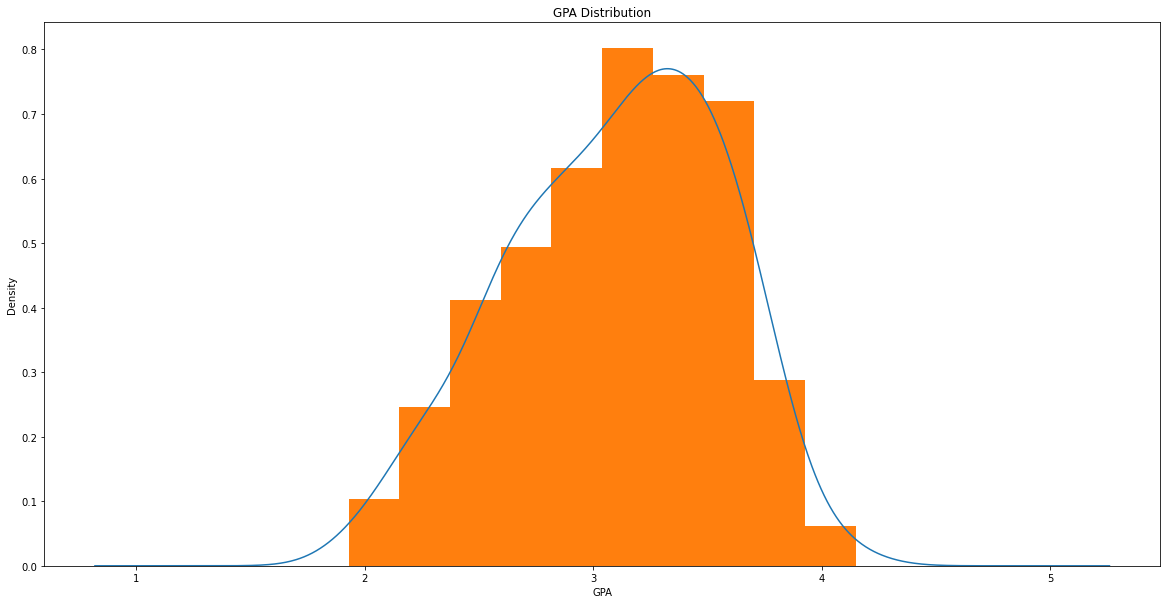

In [333]:
# Plot a probability density
ax = df_GPA['GPA'].plot.kde(figsize=(20, 10))
df_GPA['GPA'].plot(kind='hist', ax=ax, density=True)
ax.set_xlabel('GPA')
_ = ax.set_ylabel('Density')
plt.title("GPA Distribution")

Figure 4: A probability density graph of the GPA column

In [293]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Text(0.5, 1.0, 'First Gen Indication Bar Plot')

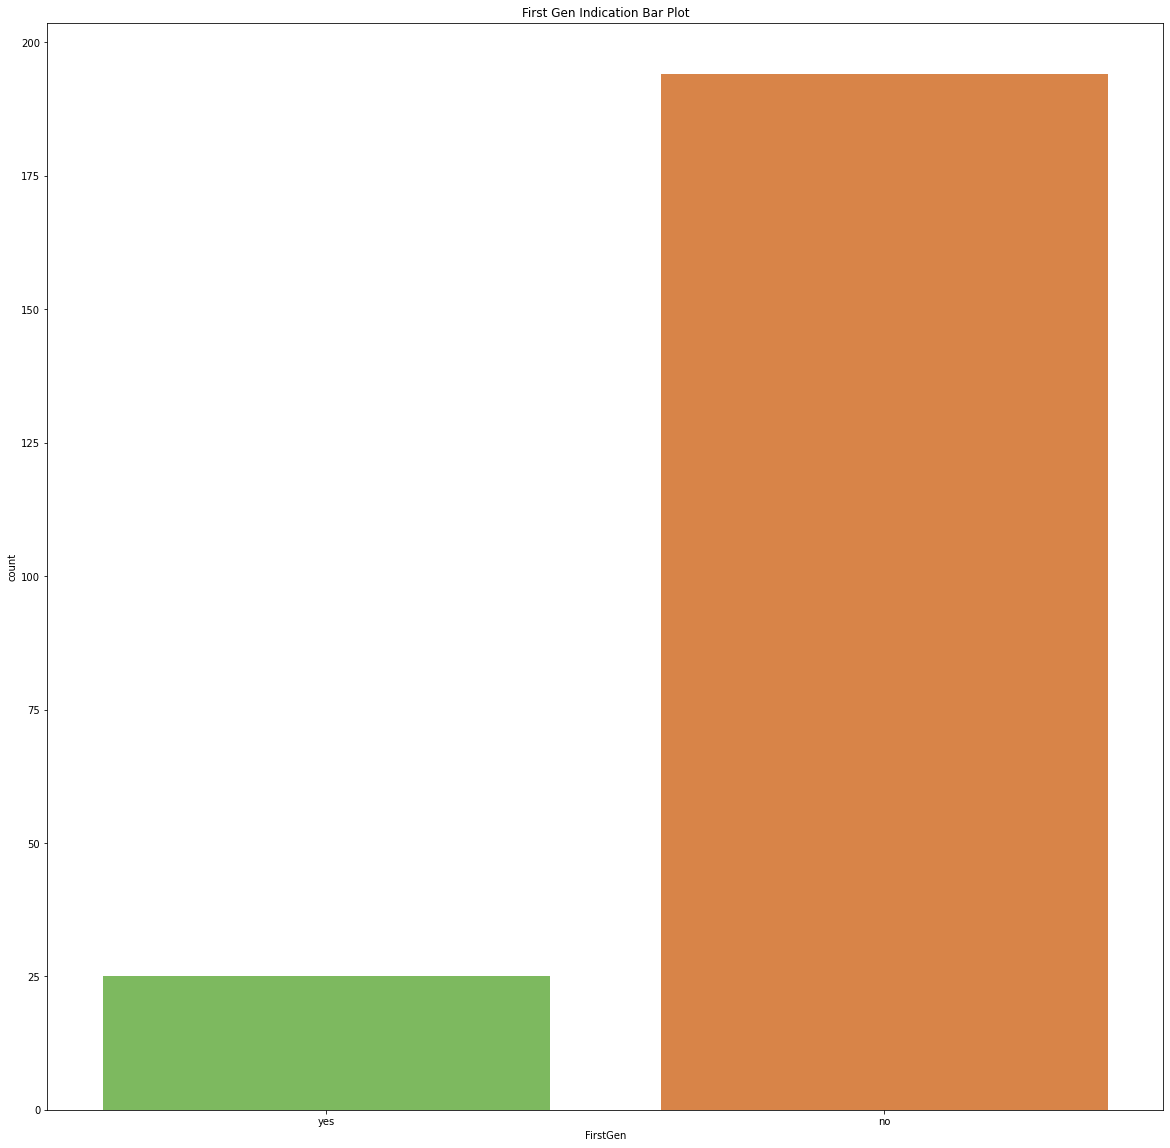

In [335]:
# A bar plot of First Gen student in college 
plt.figure(figsize=(20,20))
sns.countplot(x='FirstGen', data= df_GPA, palette=pkmn_type_colors)
plt.title("First Gen Indication Bar Plot")

Figure 5: A Bar Plot of the FirstGen column